# Data preparation

En este notebook quiero utilizar los datos que tenemos para crear un tabla que este limpia y lista para ser consumida por la etapa de modeling.

El objetivo del modeling en este caso es predecir el número de usuarios activos para cierto día y cierta hora del día. En este sentido la tabla que quiero debe tener las columnas:
* dia
* hora
* usuarios_activos (target)

Donde el día sea de lunes a domingo, las horas de 00 a 23 y los usuarios activos un entero.

Luego aplicaremos modelos predictivos para poder estimar el número de usuarios activos para un día y una hora dada.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Leyendo los datos
estaciones = pd.read_csv('ecobiciestaciones.csv')
viajes = pd.read_csv('2018-06.csv')

In [54]:
viajes.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora
fecha_hora,,,,,,,,,,
2018-06-01 00:00:11,M,31,8871,170,01/06/2018,0:00:11,133,01/06/2018,0:18:39,2018-06-01 00:00:11
2018-06-01 00:00:31,M,37,10700,123,01/06/2018,0:00:31,52,01/06/2018,0:08:16,2018-06-01 00:00:31
2018-06-01 00:00:45,M,43,6763,9,01/06/2018,0:00:45,9,01/06/2018,0:42:43,2018-06-01 00:00:45
2018-06-01 00:00:52,M,23,10316,55,01/06/2018,0:00:52,111,01/06/2018,0:13:29,2018-06-01 00:00:52
2018-06-01 00:00:57,M,23,15304,139,01/06/2018,0:00:57,155,01/06/2018,0:19:33,2018-06-01 00:00:57


In [4]:
from datetime import datetime

In [18]:
# concatenar Hora_Retiro y Fecha_Retiro
viajes.fecha_hora_retiro = viajes.Fecha_Retiro+' '+viajes.Hora_Retiro

# convertir fecha y hora a datetime
viajes.fecha_hora_retiro.head()

def convierte_fecha(str_fecha_hora):
    return datetime.strptime(str_fecha_hora, '%d/%m/%Y %H:%M:%S')

viajes['fecha_hora'] = viajes.fecha_hora_retiro.map(convierte_fecha)

# reindexing the dataframe
viajes.index = viajes.fecha_hora

# limpiando valores de otros años
viajes = viajes.loc['2018']

fecha_hora
2018-05-30 22:00:00    1
2018-05-30 23:00:00    0
2018-05-31 00:00:00    0
2018-05-31 01:00:00    0
2018-05-31 02:00:00    0
Freq: H, Name: Bici, dtype: int64


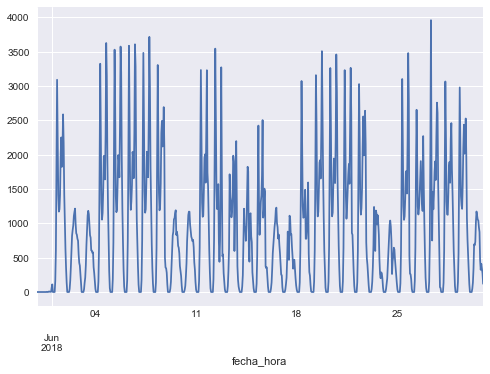

fecha_hora  fecha_hora
0           0             38.0
            1              0.0
            2              0.0
            3              0.0
            4              0.0
Name: Bici, dtype: float64

In [57]:
viajes_resample_day = viajes.Bici.resample('H').count()
print(viajes_resample_day.head())
viajes_resample_day.plot()
plt.show()
viajes_clean = viajes_resample_day \
               .groupby([viajes_resample_day.index.dayofweek,
                         viajes_resample_day.index.hour]) \
               .mean()
viajes_clean.head()

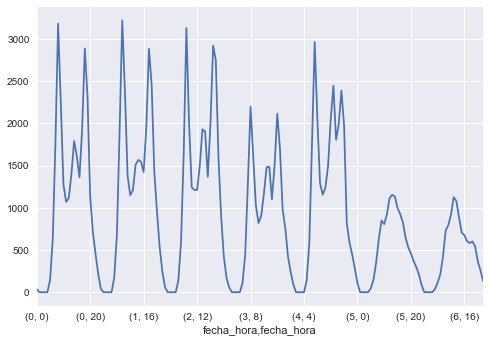

In [53]:
viajes_clean.plot()
plt.show()

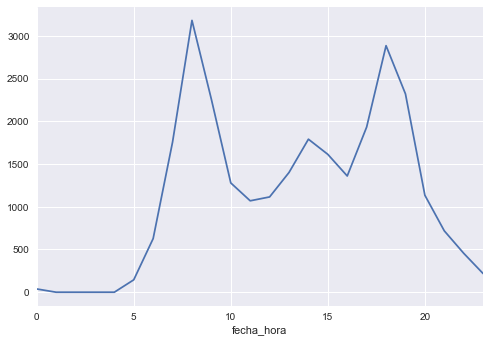

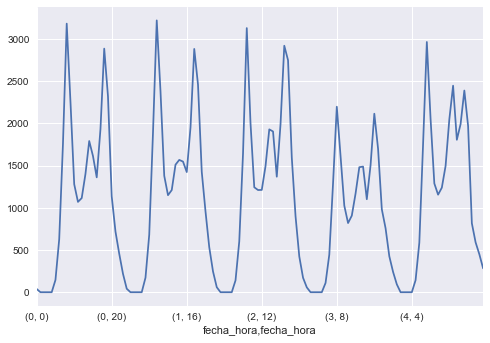

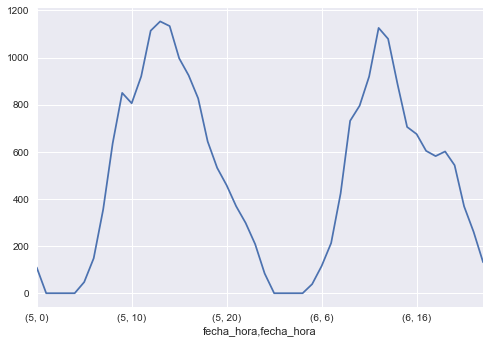

In [71]:
viajes_clean.loc[0].plot()
plt.show()
viajes_clean.loc[0:4].plot()
plt.show()
viajes_clean.loc[5:6].plot()
plt.show()


In [73]:
viajes_clean.to_csv('viajes_clean.csv')